In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras import layers 
import tensorflow as tf

## IMBD è un data set che contiene un grande numero di recensioni su film, e viene utilizzato in genere per effettuare dei test su modelli NLP

* TensorFlow ci mette a disposizione questo dataset gia tokenizzato e nel quale nei testi decidiamo il numero di parole uniche  da dizionario che vogliamo all'interno

In [2]:
(training_data, training_targets), (testing_data, testing_targets) = tf.keras.datasets.imdb.load_data(num_words= 10000)

### Uniamo i dati di test e di train per comodita del processing dei dati

In [3]:
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis = 0)

### Visualizziamo le statistiche sui dati 

In [4]:
print('Classi disponibili', np.unique(targets))
print('Numero parole uniche',len(np.unique(np.hstack(data))))
print(' ')
length = [len(i) for i in data]
print('Lunghezza media di un commento: ', np.mean(length))
print("Deviazione standard sulla lunghezza media: ", round(np.std(length)))
print('Lunghezza massima recensione', np.max(length))

Classi disponibili [0 1]
Numero parole uniche 9998
 
Lunghezza media di un commento:  234.75892
Deviazione standard sulla lunghezza media:  173
Lunghezza massima recensione 2494


In [5]:
print("Label:", targets[0])  #Visualizziamo un elemento 
print("data:", data[0])

Label: 1
data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### Costruiamo un "indice inverso" sull originale per poter risalire all'origine

In [6]:
index = tf.keras.datasets.imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join([reverse_index.get(i -3 , "#") for i in data[0]])
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Vettorizzazione 

In [7]:
def vectorize (sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data=vectorize(data)
targets = np.array(targets).astype("float32")

### Creazione Modello

In [8]:
model = tf.keras.models.Sequential()

model.add(layers.Dense(8, activation = "relu", input_shape=(10000, )))
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(1,use_bias=False, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80008     
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 80028 (312.61 KB)
Trainable params: 80028 (312.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compilazione Modello

In [9]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

### Divisione Dati addestramento e di test

In [10]:
train_x = data[:40000]
test_x = data[40000:]

train_y = targets[:40000]
test_y = targets[40000:]

### Addestramento Modello 

In [11]:
results = model.fit(
    train_x, train_y,
    epochs = 5,
    batch_size = 500,
    validation_data = (test_x, test_y))

Epoch 1/5
80/80 [==============================] - 5s 39ms/step - loss: 0.5641 - accuracy: 0.7576 - val_loss: 0.5005 - val_accuracy: 0.8571
Epoch 2/5
80/80 [==============================] - 1s 16ms/step - loss: 0.4755 - accuracy: 0.8795 - val_loss: 0.4813 - val_accuracy: 0.8814
Epoch 3/5
80/80 [==============================] - 1s 16ms/step - loss: 0.4499 - accuracy: 0.9046 - val_loss: 0.4773 - val_accuracy: 0.8875
Epoch 4/5
80/80 [==============================] - 1s 15ms/step - loss: 0.4342 - accuracy: 0.9177 - val_loss: 0.4814 - val_accuracy: 0.8875
Epoch 5/5
80/80 [==============================] - 1s 15ms/step - loss: 0.4239 - accuracy: 0.9274 - val_loss: 0.4832 - val_accuracy: 0.8890


### Illustrazione risultati di Loss e Accuracy 

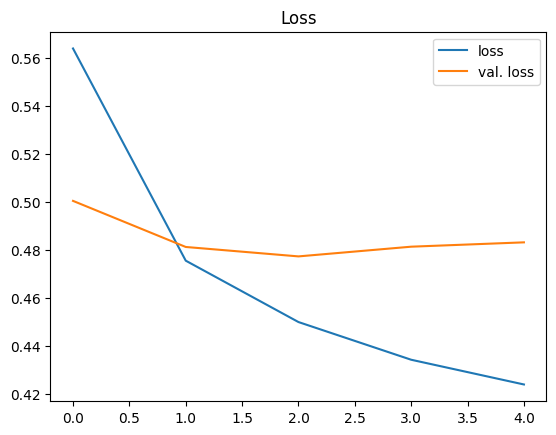

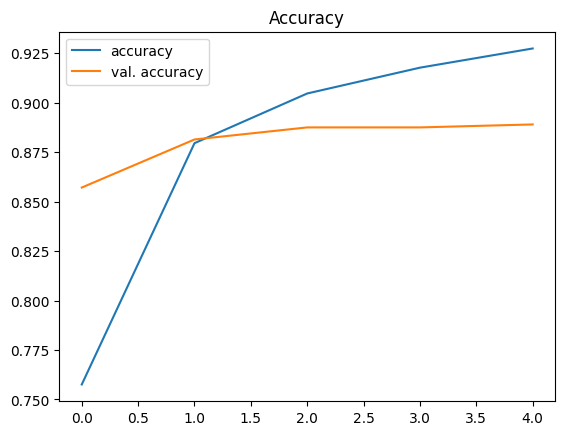

In [12]:
plt.title('Loss')
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val. loss')
plt.legend()

plt.show()

# accuratezza modello
plt.title('Accuracy')
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val. accuracy')
plt.legend()

plt.show()

In [13]:
print('risultati sul dataset di validazione:')
print('errore medio:', results.history['val_loss'][-1])
print('accuratezza:', results.history['val_accuracy'][-1] * 100, '%')

risultati sul dataset di validazione:
errore medio: 0.48318353295326233
accuratezza: 88.89999985694885 %
